<a href="https://colab.research.google.com/github/fourmodern/toc_tutorial_colab/blob/main/teachopencadd/t001_talktorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# T001 · 화합물 데이터 수집 (ChEMBL)

**참고:** 이 talktorial은 도메인별 기술을 가르치고 연구 프로젝트의 시작점으로 파이프라인 템플릿을 제공하는 것을 목표로 하는 플랫폼인 TeachOpenCADD의 일부입니다.

저자:

- Svetlana Leng, CADD seminar 2017, Volkamer lab, Charité/FU Berlin
- Paula Junge, CADD seminar 2018, Volkamer lab, Charité/FU Berlin
- Dominique Sydow, 2019-2020, [Volkamer lab, Charité](https://volkamerlab.org/)
- Andrea Volkamer, 2020, [Volkamer lab, Charité](https://volkamerlab.org/)
- Yonghui Chen, 2020, [Volkamer lab, Charité](https://volkamerlab.org/)

__Talktorial T001__: 이 talktorial은 T001-T010으로 구성된 [첫 번째 TeachOpenCADD 논문](https://jcheminf.biomedcentral.com/articles/10.1186/s13321-019-0351-x)에 설명된 TeachOpenCADD 파이프라인의 일부입니다.

## 이 talktorial의 목표

이 노트북에서는 ChEMBL 데이터베이스에 대해 더 자세히 배우고 ChEMBL에서 데이터를 추출하는 방법, 즉 관심 표적에 대한 (화합물, 활성 데이터) 쌍을 추출하는 방법을 배웁니다. 이러한 데이터 세트는 유사성 검색, 클러스터링 또는 기계 학습과 같은 많은 화학정보학 작업에 사용될 수 있습니다.

여기서 우리의 작업은 특정 표적에 대해 테스트된 화합물을 찾고 사용 가능한 생물활성 데이터를 필터링하는 것을 포함합니다.

### *이론* 내용

* ChEMBL 데이터베이스
    * ChEMBL 웹 서비스
    * ChEMBL 웹 리소스 클라이언트
* 화합물 활성 측정값
    * IC50 측정값
    * pIC50 값

### *실습* 내용
    
**목표: 주어진 표적에 대한 생물활성 데이터가 있는 화합물 목록 얻기**

* ChEMBL 데이터베이스에 연결
* 표적 데이터 가져오기 (예시: EGFR 키나제)
    * 표적 데이터 가져오기 및 다운로드
    * 표적 ChEMBL ID 선택
* 생물활성 데이터 가져오기
    * 표적에 대한 생물활성 데이터 가져오기 및 다운로드
    * 생물활성 데이터 전처리 및 필터링
* 화합물 데이터 가져오기
    * 화합물 데이터 가져오기 및 다운로드
    * 화합물 데이터 전처리 및 필터링
* 생물활성-화합물 데이터 출력
    * 생물활성 및 화합물 데이터 병합, pIC50 값 추가
    * 가장 높은 pIC50를 가진 분자 그리기
    * 생물활성 데이터를 ChEMBL 27로 고정
    * 출력 파일 작성

### 참고문헌

* ChEMBL 생물활성 데이터베이스: [Gaulton *et al.*, <i>Nucleic Acids Res.</i> (2017), 45(Database issue), D945–D954](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5210557/)
* ChEMBL 웹 서비스: [Davies *et al.*, <i>Nucleic Acids Res.</i> (2015), <b>43</b>, 612-620](https://academic.oup.com/nar/article/43/W1/W612/2467881)
* [ChEMBL 웹 인터페이스](https://www.ebi.ac.uk/chembl/)
*  GitHub [ChEMBL 웹 리소스 클라이언트](https://github.com/chembl/chembl_webresource_client)
* EBI RDF 플랫폼: [Jupp *et al.*, <i>Bioinformatics </i> (2014), 30(9), 1338-9](https://www.ncbi.nlm.nih.gov/pubmed/24413672)
* 반수 최대 억제 농도 정보: [(p)IC50](https://en.wikipedia.org/wiki/IC50)
* [UniProt 웹사이트](https://www.uniprot.org/)

## 이론

### ChEMBL 데이터베이스
>"ChEMBL은 약물 유사 특성을 가진 생물활성 분자의 수동으로 큐레이션된 데이터베이스입니다. 화학, 생물활성 및 유전체 데이터를 함께 제공하여 유전체 정보를 효과적인 신약으로 변환하는 것을 돕습니다." ([ChEMBL 웹사이트](https://www.ebi.ac.uk/chembl/))

* 개방형 대규모 생물활성 데이터베이스
* **현재 데이터 내용 (2020년 9월 기준, ChEMBL 27):**
    * 190만 개 이상의 고유 화합물
    * 1,600만 개 이상의 활성 값
    * 약 13,000개의 표적에 대한 분석
* **데이터 소스**는 과학 문헌, PubChem bioassays, Drugs for Neglected Diseases Initiative (DNDi), BindingDB 데이터베이스 등을 포함
* ChEMBL 데이터는 [웹 인터페이스](https://www.ebi.ac.uk/chembl/), [EBI-RDF 플랫폼](https://www.ncbi.nlm.nih.gov/pubmed/24413672) 및 [ChEMBL 웹 리소스 클라이언트](https://github.com/chembl/chembl_webresource_client)를 통해 접근 가능

#### ChEMBL 웹 서비스

* RESTful 웹 서비스
* ChEMBL 웹 서비스 버전 2.x 리소스 스키마:

![ChEMBL 웹 서비스 스키마](https://github.com/volkamerlab/teachopencadd/blob/master/teachopencadd/talktorials/T001_query_chembl/images/chembl_webservices_schema_diagram.jpg?raw=1)

*그림 1:*
"[ChEMBL 웹 서비스 스키마 다이어그램](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4489243/figure/F2/). 타원형은 ChEMBL 웹 서비스 리소스를 나타내고 두 리소스 사이의 선은 공통 속성을 공유함을 나타냅니다. 화살표 방향은 리소스 유형에 대한 주요 정보를 찾을 수 있는 위치를 보여줍니다. 점선은 두 리소스 간의 관계가 다르게 동작함을 나타냅니다. 예를 들어, `Image` 리소스는 `Molecule`의 그래픽 기반 표현을 제공합니다."
그림과 설명은 다음에서 가져왔습니다: [<i>Nucleic Acids Res.</i> (2015), <b>43</b>, 612-620](https://academic.oup.com/nar/article/43/W1/W612/2467881).

#### ChEMBL 웹 리소스 클라이언트

* ChEMBL 데이터에 접근하기 위한 Python 클라이언트 라이브러리
* HTTPS 프로토콜과의 상호작용 처리
* 결과의 지연 평가(lazy evaluation) -> 네트워크 요청 수 감소

### 화합물 활성 측정값

#### IC50 측정값

* [반수 최대 억제 농도](https://en.wikipedia.org/wiki/IC50)
* 특정 약물이나 다른 물질이 주어진 생물학적 과정을 절반으로 억제하는 데 필요한 양을 나타냄

![Wiki_Example_IC50_curve_demonstrating_visually_how_IC50_is_derived](https://github.com/volkamerlab/teachopencadd/blob/master/teachopencadd/talktorials/T001_query_chembl/images/Wiki_Example_IC50_curve_demonstrating_visually_how_IC50_is_derived.png?raw=1)

*그림 2:* IC50 값을 도출하는 방법의 시각적 시연:
(i) y축에 억제 데이터를, x축에 log(농도)를 배치합니다. (ii) 최대 및 최소 억제를 확인합니다. (iii) IC50은 곡선이 50% 억제 수준을 통과하는 농도입니다. 그림 ["IC50 곡선이 어떻게 도출되는지 시각적으로 보여주는 예시"](https://en.wikipedia.org/wiki/IC50#/media/File:Example_IC50_curve_demonstrating_visually_how_IC50_is_derived.png)는 JesseAlanGordon이 [CC BY-SA 3.0](https://creativecommons.org/licenses/by-sa/3.0/) 라이선스 하에 제공했습니다.

#### pIC50 value

* To facilitate the comparison of IC50 values, which have a large value range and are given in different units (M, nM, ...), often pIC50 values are used
* The pIC50 is the negative log of the IC50 value when converted to molar units:
    $ pIC_{50} = -log_{10}(IC_{50}) $, where $ IC_{50}$ is specified in units of M
* Higher pIC50 values indicate exponentially greater potency of the drug
* Note that the conversion can be adapted to the respective IC50 unit, e.g. for nM: $pIC_{50} = -log_{10}(IC_{50}*10^{-9})= 9-log_{10}(IC_{50}) $

Other activity measures:

Besides, IC50 and pIC50, other bioactivity measures are used, such as the equilibrium constant [KI](https://en.wikipedia.org/wiki/Equilibrium_constant) and the half-maximal effective concentration  [EC50](https://en.wikipedia.org/wiki/EC50).

## 실습

다음에서는 우리가 관심있는 표적인 **표피 성장 인자 수용체** ([**EGFR**](https://www.uniprot.org/uniprot/P00533)) 키나제에 대해 테스트된 모든 분자를 다운로드하려고 합니다.

### ChEMBL 데이터베이스 연결

먼저 ChEMBL 웹 리소스 클라이언트와 다른 Python 라이브러리들을 가져옵니다.

In [4]:
!pip install rdkit

  Using cached rdkit-2024.3.5-cp310-cp310-manylinux_2_28_x86_64.whl.metadata (3.9 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.1/33.1 MB 49.8 MB/s eta 0:00:00


In [2]:
!pip install chembl_webresource_client

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.2/55.2 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 4.3 MB/s eta 0:00:00


In [5]:
import math
from pathlib import Path
from zipfile import ZipFile
from tempfile import TemporaryDirectory

import numpy as np
import pandas as pd
from rdkit.Chem import PandasTools
from chembl_webresource_client.new_client import new_client
from tqdm.auto import tqdm

In [6]:
HERE = Path(_dh[-1])
DATA = HERE / "data"

다음으로, API 접근을 위한 리소스 객체를 생성합니다.

In [7]:
targets_api = new_client.target
compounds_api = new_client.molecule
bioactivities_api = new_client.activity

In [8]:
type(targets_api)

chembl_webresource_client.query_set.QuerySet

### 표적 데이터 가져오기 (EGFR 키나제)

* [UniProt 웹사이트](https://www.uniprot.org/)에서 관심 표적의 UniProt ID를 가져옵니다 (EGFR 키나제: [P00533](http://www.uniprot.org/uniprot/P00533))
* UniProt ID를 사용하여 표적 정보를 가져옵니다

다른 표적에 관심이 있다면 다른 UniProt ID를 선택하세요.

In [9]:
uniprot_id = "P00533"

#### ChEMBL에서 표적 데이터 가져오기

In [10]:
# Get target information from ChEMBL but restrict it to specified values only
targets = targets_api.get(target_components__accession=uniprot_id).only(
    "target_chembl_id", "organism", "pref_name", "target_type"
)
print(f'The type of the targets is "{type(targets)}"')

The type of the targets is "<class 'chembl_webresource_client.query_set.QuerySet'>"


#### ChEMBL에서 표적 데이터 다운로드

쿼리 결과는 `targets`에 저장되며, 이는 `QuerySet`입니다. 즉, 우리가 요청하기 전까지는 ChEMBL에서 결과를 가져오지 않습니다 (여기서는 `pandas.DataFrame.from_records`를 사용).

`QuerySet` 데이터타입에 대한 추가 정보:

> QuerySet은 지연(lazy) 평가됩니다 – QuerySet을 생성하는 행위는 데이터베이스 활동을 포함하지 않습니다. 필터를 계속 쌓을 수 있고, Django는 QuerySet이 평가될 때까지 실제로 쿼리를 실행하지 않습니다.
([querysets-are-lazy](https://docs.djangoproject.com/en/3.0/topics/db/queries/#querysets-are-lazy))

In [11]:
targets = pd.DataFrame.from_records(targets)
targets

,organism,pref_name,target_chembl_id,target_type
0,Homo sapiens,Epidermal growth factor receptor erbB1,CHEMBL203,SINGLE PROTEIN
1,Homo sapiens,Epidermal growth factor receptor erbB1,CHEMBL203,SINGLE PROTEIN
2,Homo sapiens,Epidermal growth factor receptor and ErbB2 (HE...,CHEMBL2111431,PROTEIN FAMILY
3,Homo sapiens,Epidermal growth factor receptor,CHEMBL2363049,PROTEIN FAMILY
4,Homo sapiens,MER intracellular domain/EGFR extracellular do...,CHEMBL3137284,CHIMERIC PROTEIN
5,Homo sapiens,Protein cereblon/Epidermal growth factor receptor,CHEMBL4523680,PROTEIN-PROTEIN INTERACTION
6,Homo sapiens,EGFR/PPP1CA,CHEMBL4523747,PROTEIN-PROTEIN INTERACTION
7,Homo sapiens,VHL/EGFR,CHEMBL4523998,PROTEIN-PROTEIN INTERACTION
8,Homo sapiens,Baculoviral IAP repeat-containing protein 2/Ep...,CHEMBL4802031,PROTEIN-PROTEIN INTERACTION


#### 표적 선택 (표적 ChEMBL ID)

항목을 확인한 후, 첫 번째 항목을 우리의 관심 표적으로 선택합니다:

`CHEMBL203`: 이것은 단일 단백질이며 인간 표피 성장 인자 수용체(EGFR, erbB1이라고도 함)를 나타냅니다

In [12]:
target = targets.iloc[0]
target

,0
organism,Homo sapiens
pref_name,Epidermal growth factor receptor erbB1
target_chembl_id,CHEMBL203
target_type,SINGLE PROTEIN


선택한 ChEMBL ID를 저장합니다.

In [13]:
chembl_id = target.target_chembl_id
print(f"The target ChEMBL ID is {chembl_id}")
# NBVAL_CHECK_OUTPUT

The target ChEMBL ID is CHEMBL203


### 생물활성 데이터 가져오기

이제 관심 표적에 대한 생물활성 데이터를 쿼리하려고 합니다.

#### ChEMBL에서 표적의 생물활성 데이터 가져오기

이 단계에서는 생물활성 데이터를 가져와서 다음만 고려하도록 필터링합니다:

* 인간 단백질,
* 생물활성 타입 IC50,
* 정확한 측정값 (관계 `'='`), 그리고
* 결합 데이터 (분석 타입 `'B'`).

In [14]:
bioactivities = bioactivities_api.filter(
    target_chembl_id=chembl_id, type="IC50", relation="=", assay_type="B"
).only(
    "activity_id",
    "assay_chembl_id",
    "assay_description",
    "assay_type",
    "molecule_chembl_id",
    "type",
    "standard_units",
    "relation",
    "standard_value",
    "target_chembl_id",
    "target_organism",
)

print(f"Length and type of bioactivities object: {len(bioactivities)}, {type(bioactivities)}")

Length and type of bioactivities object: 10924, <class 'chembl_webresource_client.query_set.QuerySet'>


우리의 생물활성 세트의 각 항목은 다음 정보를 포함합니다:

In [15]:
print(f"Length and type of first element: {len(bioactivities[0])}, {type(bioactivities[0])}")
bioactivities[0]

Length and type of first element: 13, <class 'dict'>


{'activity_id': 32260,
 'assay_chembl_id': 'CHEMBL674637',
 'assay_description': 'Inhibitory activity towards tyrosine phosphorylation for the epidermal growth factor-receptor kinase',
 'assay_type': 'B',
 'molecule_chembl_id': 'CHEMBL68920',
 'relation': '=',
 'standard_units': 'nM',
 'standard_value': '41.0',
 'target_chembl_id': 'CHEMBL203',
 'target_organism': 'Homo sapiens',
 'type': 'IC50',
 'units': 'uM',
 'value': '0.041'}

#### ChEMBL에서 생물활성 데이터 다운로드

마지막으로, `QuerySet`을 `pandas` `DataFrame` 형태로 다운로드합니다.

> **참고**: 이 단계는 2분 이상 걸리지 않아야 합니다. 만약 그렇다면 _"ChEMBL에서 표적의 생물활성 데이터 가져오기"_ 부터 모든 셀을 다시 실행하거나 아래 메시지를 읽어보세요:

<details>
    
<summary>데이터를 가져오는 데 문제가 발생한 경우 로컬 버전의 데이터 로드</summary>
    
ChEMBL 데이터베이스를 쿼리하는 데 어려움을 겪는다면, 아래 셀에서 구성할 결과 데이터프레임도 제공합니다. 저장된 버전을 사용하려면 `bioactivities_df`를 얻기 위해 다음 코드를 대신 사용하세요:
  
```python
# 아래 셀의 첫 번째 줄을 이 다른 줄로 교체하세요
bioactivities_df = pd.read_csv(DATA / "EGFR_bioactivities_CHEMBL27.csv.zip", index_col=0)
```

</details>

In [16]:
bioactivities_df = pd.DataFrame.from_dict(bioactivities)
print(f"DataFrame shape: {bioactivities_df.shape}")
bioactivities_df.head()

DataFrame shape: (10924, 13)


,activity_id,assay_chembl_id,assay_description,assay_type,molecule_chembl_id,relation,standard_units,standard_value,target_chembl_id,target_organism,type,units,value
0,32260,CHEMBL674637,Inhibitory activity towards tyrosine phosphory...,B,CHEMBL68920,=,nM,41.0,CHEMBL203,Homo sapiens,IC50,uM,0.041
1,32267,CHEMBL674637,Inhibitory activity towards tyrosine phosphory...,B,CHEMBL69960,=,nM,170.0,CHEMBL203,Homo sapiens,IC50,uM,0.17
2,32680,CHEMBL677833,In vitro inhibition of Epidermal growth factor...,B,CHEMBL137635,=,nM,9300.0,CHEMBL203,Homo sapiens,IC50,uM,9.3
3,32770,CHEMBL674643,Inhibitory concentration of EGF dependent auto...,B,CHEMBL306988,=,nM,500000.0,CHEMBL203,Homo sapiens,IC50,uM,500.0
4,32772,CHEMBL674643,Inhibitory concentration of EGF dependent auto...,B,CHEMBL66879,=,nM,3000000.0,CHEMBL203,Homo sapiens,IC50,uM,3000.0


처음 두 행이 동일한 생물활성 항목을 설명한다는 점에 유의하세요. 이러한 아티팩트는 나중에 중복 제거 단계에서 제거할 것입니다. 또한 `standard_units`/`units`와 `standard_values`/`values` 열이 있다는 점에 유의하세요. 다음에서는 표준화된 열(ChEMBL에 의한 표준화)을 사용할 것이므로 다른 두 열은 삭제합니다.

`units`와 `values` 열을 사용한다면, 많은 다른 단위의 모든 값을 nM으로 변환해야 합니다:

In [17]:
bioactivities_df["units"].unique()

array(['uM', 'nM', 'pM', 'M', "10'3 uM", "10'1 ug/ml", 'ug ml-1',
       "10'-1microM", "10'1 uM", "10'-1 ug/ml", "10'-2 ug/ml", "10'2 uM",
       "10'-3 ug/ml", "10'-2microM", '/uM', "10'-6g/ml", 'mM', 'umol/L',
       'nmol/L', "10'-10M", "10'-7M", 'nmol', '10^-8M'], dtype=object)

In [18]:
bioactivities_df.drop(["units", "value"], axis=1, inplace=True)
bioactivities_df.head()

,activity_id,assay_chembl_id,assay_description,assay_type,molecule_chembl_id,relation,standard_units,standard_value,target_chembl_id,target_organism,type
0,32260,CHEMBL674637,Inhibitory activity towards tyrosine phosphory...,B,CHEMBL68920,=,nM,41.0,CHEMBL203,Homo sapiens,IC50
1,32267,CHEMBL674637,Inhibitory activity towards tyrosine phosphory...,B,CHEMBL69960,=,nM,170.0,CHEMBL203,Homo sapiens,IC50
2,32680,CHEMBL677833,In vitro inhibition of Epidermal growth factor...,B,CHEMBL137635,=,nM,9300.0,CHEMBL203,Homo sapiens,IC50
3,32770,CHEMBL674643,Inhibitory concentration of EGF dependent auto...,B,CHEMBL306988,=,nM,500000.0,CHEMBL203,Homo sapiens,IC50
4,32772,CHEMBL674643,Inhibitory concentration of EGF dependent auto...,B,CHEMBL66879,=,nM,3000000.0,CHEMBL203,Homo sapiens,IC50


#### 생물활성 데이터 전처리 및 필터링

1. `standard_value`의 데이터타입을 `object`에서 `float`로 변환
2. 누락된 값이 있는 항목 삭제
3. `standard_unit == nM`인 항목만 유지
4. 중복 분자 삭제
5. `DataFrame` 인덱스 재설정
6. 열 이름 변경

**1. "standard_value"의 데이터타입을 "object"에서 "float"로 변환**

`standard_value` 필드는 표준화된 (여기서는 IC50) 값을 포함합니다. 나중에 계산에서 이 값들을 사용할 수 있도록 하기 위해 float로 변환합니다.

In [19]:
bioactivities_df.dtypes

,0
activity_id,int64
assay_chembl_id,object
assay_description,object
assay_type,object
molecule_chembl_id,object
relation,object
standard_units,object
standard_value,object
target_chembl_id,object
target_organism,object


In [20]:
bioactivities_df = bioactivities_df.astype({"standard_value": "float64"})
bioactivities_df.dtypes

,0
activity_id,int64
assay_chembl_id,object
assay_description,object
assay_type,object
molecule_chembl_id,object
relation,object
standard_units,object
standard_value,float64
target_chembl_id,object
target_organism,object


**2. 누락된 값이 있는 항목 삭제**

현재 `DataFrame`에서 직접 값을 삭제하기 위해 `inplace=True` 파라미터를 사용합니다.

In [21]:
bioactivities_df.dropna(axis=0, how="any", inplace=True)
print(f"DataFrame shape: {bioactivities_df.shape}")

DataFrame shape: (10923, 11)


**3. "standard_unit == nM"인 항목만 유지**

`nM` 단위의 생물활성 항목만 유지하고자 하므로 다른 단위의 모든 항목을 제거합니다.

In [22]:
print(f"Units in downloaded data: {bioactivities_df['standard_units'].unique()}")
print(
    f"Number of non-nM entries:\
    {bioactivities_df[bioactivities_df['standard_units'] != 'nM'].shape[0]}"
)

Units in downloaded data: ['nM' 'ug.mL-1' '/uM']
Number of non-nM entries:    69


In [23]:
bioactivities_df = bioactivities_df[bioactivities_df["standard_units"] == "nM"]
print(f"Units after filtering: {bioactivities_df['standard_units'].unique()}")

Units after filtering: ['nM']


In [24]:
print(f"DataFrame shape: {bioactivities_df.shape}")

DataFrame shape: (10854, 11)


**4. 중복 분자 삭제**

때때로 같은 분자(`molecule_chembl_id`)가 한 번 이상 테스트되었을 수 있으며, 이 경우 첫 번째 것만 유지합니다.

다른 선택으로는 가장 좋은 값을 가진 것을 유지하거나 해당 화합물의 모든 분석 결과의 평균값을 사용할 수도 있습니다.

In [25]:
bioactivities_df.drop_duplicates("molecule_chembl_id", keep="first", inplace=True)
print(f"DataFrame shape: {bioactivities_df.shape}")

DataFrame shape: (7081, 11)


<ipython-input-25-d75850a7340e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bioactivities_df.drop_duplicates("molecule_chembl_id", keep="first", inplace=True)


**5. "DataFrame" 인덱스 재설정**

일부 행을 삭제했지만 나중에 인덱스를 반복하고자 하므로 인덱스를 연속적으로 재설정합니다.

In [26]:
bioactivities_df.reset_index(drop=True, inplace=True)
bioactivities_df.head()

,activity_id,assay_chembl_id,assay_description,assay_type,molecule_chembl_id,relation,standard_units,standard_value,target_chembl_id,target_organism,type
0,32260,CHEMBL674637,Inhibitory activity towards tyrosine phosphory...,B,CHEMBL68920,=,nM,41.0,CHEMBL203,Homo sapiens,IC50
1,32267,CHEMBL674637,Inhibitory activity towards tyrosine phosphory...,B,CHEMBL69960,=,nM,170.0,CHEMBL203,Homo sapiens,IC50
2,32680,CHEMBL677833,In vitro inhibition of Epidermal growth factor...,B,CHEMBL137635,=,nM,9300.0,CHEMBL203,Homo sapiens,IC50
3,32770,CHEMBL674643,Inhibitory concentration of EGF dependent auto...,B,CHEMBL306988,=,nM,500000.0,CHEMBL203,Homo sapiens,IC50
4,32772,CHEMBL674643,Inhibitory concentration of EGF dependent auto...,B,CHEMBL66879,=,nM,3000000.0,CHEMBL203,Homo sapiens,IC50


**6. 열 이름 변경**

In [27]:
bioactivities_df.rename(
    columns={"standard_value": "IC50", "standard_units": "units"}, inplace=True
)
bioactivities_df.head()

<ipython-input-27-dec25f3a9f17>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bioactivities_df.rename(


,activity_id,assay_chembl_id,assay_description,assay_type,molecule_chembl_id,relation,units,IC50,target_chembl_id,target_organism,type
0,32260,CHEMBL674637,Inhibitory activity towards tyrosine phosphory...,B,CHEMBL68920,=,nM,41.0,CHEMBL203,Homo sapiens,IC50
1,32267,CHEMBL674637,Inhibitory activity towards tyrosine phosphory...,B,CHEMBL69960,=,nM,170.0,CHEMBL203,Homo sapiens,IC50
2,32680,CHEMBL677833,In vitro inhibition of Epidermal growth factor...,B,CHEMBL137635,=,nM,9300.0,CHEMBL203,Homo sapiens,IC50
3,32770,CHEMBL674643,Inhibitory concentration of EGF dependent auto...,B,CHEMBL306988,=,nM,500000.0,CHEMBL203,Homo sapiens,IC50
4,32772,CHEMBL674643,Inhibitory concentration of EGF dependent auto...,B,CHEMBL66879,=,nM,3000000.0,CHEMBL203,Homo sapiens,IC50


In [28]:
print(f"DataFrame shape: {bioactivities_df.shape}")

DataFrame shape: (7081, 11)


이제 우리의 표적 키나제에 대한 각각의 IC50 값을 가진 **5575**개의 분자 ID 세트를 가지고 있습니다.

### 화합물 데이터 가져오기

우리는 EGFR에 대해 테스트된 모든 분자를 포함하는 `DataFrame`을 가지고 있습니다 (각각의 측정된 생물활성과 함께).

이제 각각의 생물활성 ChEMBL ID에 연결된 분자의 분자 구조를 얻고자 합니다.

#### ChEMBL에서 화합물 데이터 가져오기

우리가 생물활성 데이터를 정의한 ChEMBL의 화합물들을 살펴봅시다: 필터링된 생물활성 데이터에 연결된 화합물의 ChEMBL ID와 구조를 가져옵니다.

In [29]:
compounds_provider = compounds_api.filter(
    molecule_chembl_id__in=list(bioactivities_df["molecule_chembl_id"])
).only("molecule_chembl_id", "molecule_structures")

#### ChEMBL에서 화합물 데이터 다운로드

다시, `QuerySet` 객체를 `pandas.DataFrame`으로 내보내고자 합니다. 데이터 양을 고려하면 **이 작업은 시간이 걸릴 수 있습니다.** 그런 이유로, 먼저 `tqdm`을 통해 레코드 목록을 얻어서 진행 표시줄과 예상 시간을 볼 수 있도록 합니다. 그런 다음 화합물 목록을 DataFrame에 전달할 수 있습니다.

In [30]:
compounds = list(tqdm(compounds_provider))

  0%|          | 0/7081 [00:00<?, ?it/s]

In [31]:
compounds_df = pd.DataFrame.from_records(
    compounds,
)
print(f"DataFrame shape: {compounds_df.shape}")

DataFrame shape: (7081, 2)


In [32]:
compounds_df.head()

,molecule_chembl_id,molecule_structures
0,CHEMBL6246,{'canonical_smiles': 'O=c1oc2c(O)c(O)cc3c(=O)o...
1,CHEMBL10,{'canonical_smiles': 'C[S+]([O-])c1ccc(-c2nc(-...
2,CHEMBL6976,{'canonical_smiles': 'COc1cc2c(cc1OC)Nc1ncn(C)...
3,CHEMBL7002,{'canonical_smiles': 'CC1(COc2ccc(CC3SC(=O)NC3...
4,CHEMBL414013,{'canonical_smiles': 'COc1cc2c(cc1OC)Nc1ncnc(O...


#### 화합물 데이터 전처리 및 필터링

1. 누락된 항목이 있는 항목 제거
2. 중복 분자 삭제 (molecule_chembl_id 기준)
3. 표준 SMILES를 가진 분자 가져오기

**1. 분자 구조 항목이 누락된 항목 제거**

In [33]:
compounds_df.dropna(axis=0, how="any", inplace=True)
print(f"DataFrame shape: {compounds_df.shape}")

DataFrame shape: (7074, 2)


**2. 중복 분자 삭제**

In [34]:
compounds_df.drop_duplicates("molecule_chembl_id", keep="first", inplace=True)
print(f"DataFrame shape: {compounds_df.shape}")

DataFrame shape: (7074, 2)


**3. 표준 SMILES를 가진 분자 가져오기**

지금까지 여러 가지 다른 분자 구조 표현을 가지고 있습니다. 표준 SMILES만 유지하고자 합니다.

In [35]:
compounds_df.iloc[0].molecule_structures.keys()

dict_keys(['canonical_smiles', 'molfile', 'standard_inchi', 'standard_inchi_key'])

In [36]:
canonical_smiles = []

for i, compounds in compounds_df.iterrows():
    try:
        canonical_smiles.append(compounds["molecule_structures"]["canonical_smiles"])
    except KeyError:
        canonical_smiles.append(None)

compounds_df["smiles"] = canonical_smiles
compounds_df.drop("molecule_structures", axis=1, inplace=True)
print(f"DataFrame shape: {compounds_df.shape}")

DataFrame shape: (7074, 2)


건전성 확인: 표준 SMILES 문자열이 없는 모든 분자를 제거합니다.

In [37]:
compounds_df.dropna(axis=0, how="any", inplace=True)
print(f"DataFrame shape: {compounds_df.shape}")

DataFrame shape: (7074, 2)


### 출력 (생물활성-화합물) 데이터
**화합물 및 생물활성 데이터 요약**

In [38]:
print(f"Bioactivities filtered: {bioactivities_df.shape[0]}")
bioactivities_df.columns

Bioactivities filtered: 7081


Index(['activity_id', 'assay_chembl_id', 'assay_description', 'assay_type',
       'molecule_chembl_id', 'relation', 'units', 'IC50', 'target_chembl_id',
       'target_organism', 'type'],
      dtype='object')

In [39]:
print(f"Compounds filtered: {compounds_df.shape[0]}")
compounds_df.columns

Compounds filtered: 7074


Index(['molecule_chembl_id', 'smiles'], dtype='object')

#### 두 데이터셋 병합

화합물의 ChEMBL ID (`molecule_chembl_id`)를 기준으로 `bioactivities_df`와 `compounds_df`에서 관심 있는 값들을 `output_df`로 병합하며, 다음 열들을 유지합니다:

* ChEMBL ID: `molecule_chembl_id`
* SMILES: `smiles`
* 단위: `units`
* IC50: `IC50`

In [40]:
# Merge DataFrames
output_df = pd.merge(
    bioactivities_df[["molecule_chembl_id", "IC50", "units"]],
    compounds_df,
    on="molecule_chembl_id",
)

# Reset row indices
output_df.reset_index(drop=True, inplace=True)

print(f"Dataset with {output_df.shape[0]} entries.")

Dataset with 7074 entries.


In [41]:
output_df.dtypes

,0
molecule_chembl_id,object
IC50,float64
units,object
smiles,object


In [42]:
output_df.head(10)

,molecule_chembl_id,IC50,units,smiles
0,CHEMBL68920,41.0,nM,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...
1,CHEMBL69960,170.0,nM,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...
2,CHEMBL137635,9300.0,nM,CN(c1ccccc1)c1ncnc2ccc(N/N=N/Cc3ccccn3)cc12
3,CHEMBL306988,500000.0,nM,CC(=C(C#N)C#N)c1ccc(NC(=O)CCC(=O)O)cc1
4,CHEMBL66879,3000000.0,nM,O=C(O)/C=C/c1ccc(O)cc1
5,CHEMBL77085,96000.0,nM,N#CC(C#N)=Cc1cc(O)ccc1[N+](=O)[O-]
6,CHEMBL443268,5310.0,nM,Cc1cc(C(=O)NCCN2CCOCC2)[nH]c1/C=C1\C(=O)N(C)c2...
7,CHEMBL76979,264000.0,nM,COc1cc(/C=C(\C#N)C(=O)O)cc(OC)c1O
8,CHEMBL76589,125.0,nM,N#CC(C#N)=C(N)/C(C#N)=C/c1ccc(O)cc1
9,CHEMBL76904,35000.0,nM,N#CC(C#N)=Cc1ccc(O)c(O)c1


#### pIC50 값 추가

보시다시피 낮은 IC50 값은 읽기 어렵습니다 (값이 여러 척도에 걸쳐 분포). 그래서 IC50 값을 pIC50으로 변환합니다.

In [43]:
def convert_ic50_to_pic50(IC50_value):
    pIC50_value = 9 - math.log10(IC50_value)
    return pIC50_value

In [44]:
# Apply conversion to each row of the compounds DataFrame
output_df["pIC50"] = output_df.apply(lambda x: convert_ic50_to_pic50(x.IC50), axis=1)

In [45]:
output_df.head()

,molecule_chembl_id,IC50,units,smiles,pIC50
0,CHEMBL68920,41.0,nM,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,7.387216
1,CHEMBL69960,170.0,nM,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,6.769551
2,CHEMBL137635,9300.0,nM,CN(c1ccccc1)c1ncnc2ccc(N/N=N/Cc3ccccn3)cc12,5.031517
3,CHEMBL306988,500000.0,nM,CC(=C(C#N)C#N)c1ccc(NC(=O)CCC(=O)O)cc1,3.301030
4,CHEMBL66879,3000000.0,nM,O=C(O)/C=C/c1ccc(O)cc1,2.522879


#### 화합물 데이터 그리기

수집한 데이터 세트를 살펴봅시다.

먼저 pIC50 값 분포를 그립니다

array([[<Axes: title={'center': 'pIC50'}>]], dtype=object)

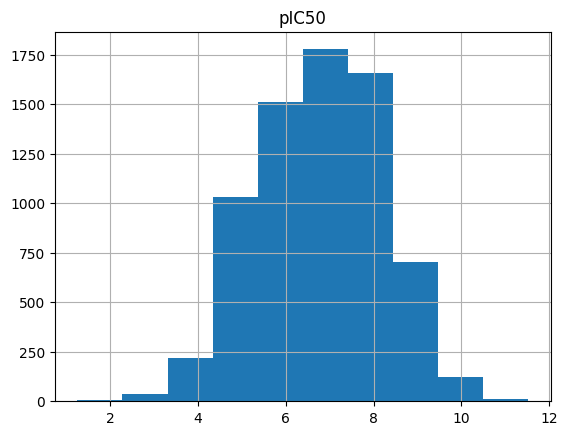

In [46]:
output_df.hist(column="pIC50")

다음 단계에서는 `DataFrame`에 RDKit 분자 객체를 위한 열을 추가하고 가장 높은 pIC50 값을 가진 분자의 구조를 살펴봅니다.

In [47]:
# Add molecule column
PandasTools.AddMoleculeColumnToFrame(output_df, smilesCol="smiles")

In [48]:
# Sort molecules by pIC50
output_df.sort_values(by="pIC50", ascending=False, inplace=True)

# Reset index
output_df.reset_index(drop=True, inplace=True)

가장 활성이 높은 세 분자, 즉 가장 높은 pIC50 값을 가진 분자들을 보여줍니다.

In [49]:
output_df.drop("smiles", axis=1).head(3)

,molecule_chembl_id,IC50,units,pIC50,ROMol
0,CHEMBL63786,0.003,nM,11.522879,<rdkit.Chem.rdchem.Mol object at 0x7977b08a9930>
1,CHEMBL53711,0.006,nM,11.221849,<rdkit.Chem.rdchem.Mol object at 0x7977b08a10e0>
2,CHEMBL35820,0.006,nM,11.221849,<rdkit.Chem.rdchem.Mol object at 0x7977b0894270>


In [50]:
# Prepare saving the dataset: Drop the ROMol column
output_df = output_df.drop("ROMol", axis=1)
print(f"DataFrame shape: {output_df.shape}")

DataFrame shape: (7074, 5)


#### 출력 데이터를 ChEMBL 27로 고정

이것은 기술적인 단계입니다: 일반적으로는 방금 생성한 데이터셋(최신 데이터셋)으로 계속 작업합니다.

그러나 여기 TeachOpenCADD 플랫폼에서는 데이터셋을 특정 ChEMBL 릴리스(즉, [ChEMBL 27](http://doi.org/10.6019/CHEMBL.database.27))로 고정하는 것을 선호합니다.
이렇게 하면 이 talktorial과 CADD 파이프라인의 다른 하위 talktorial들이 미래에 변경되지 않습니다(talktorial 유지 관리에 도움이 됨).

<div class="alert alert-block alert-info">

<b>참고:</b> 최신 데이터셋에서 이 노트북을 실행하거나 다른 표적에 사용하려면 아래 셀을 주석 처리하세요.

</div>

In [52]:
!wget https://github.com/volkamerlab/teachopencadd/raw/refs/heads/master/teachopencadd/talktorials/T001_query_chembl/data/EGFR_compounds_ea055ef.csv
# Disable this cell to unfreeze the dataset
output_df = pd.read_csv(
    "EGFR_compounds_ea055ef.csv", index_col=0, float_precision="round_trip"
)
output_df.head()

--2024-09-21 06:51:33--  https://github.com/volkamerlab/teachopencadd/raw/refs/heads/master/teachopencadd/talktorials/T001_query_chembl/data/EGFR_compounds_ea055ef.csv
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/volkamerlab/teachopencadd/refs/heads/master/teachopencadd/talktorials/T001_query_chembl/data/EGFR_compounds_ea055ef.csv [following]
--2024-09-21 06:51:34--  https://raw.githubusercontent.com/volkamerlab/teachopencadd/refs/heads/master/teachopencadd/talktorials/T001_query_chembl/data/EGFR_compounds_ea055ef.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 547689 (535K) [text/plain]


,molecule_chembl_id,IC50,units,smiles,pIC50
0,CHEMBL63786,0.003,nM,Brc1cccc(Nc2ncnc3cc4ccccc4cc23)c1,11.522879
1,CHEMBL35820,0.006,nM,CCOc1cc2ncnc(Nc3cccc(Br)c3)c2cc1OCC,11.221849
2,CHEMBL53711,0.006,nM,CN(C)c1cc2c(Nc3cccc(Br)c3)ncnc2cn1,11.221849
3,CHEMBL66031,0.008,nM,Brc1cccc(Nc2ncnc3cc4[nH]cnc4cc23)c1,11.096910
4,CHEMBL53753,0.008,nM,CNc1cc2c(Nc3cccc(Br)c3)ncnc2cn1,11.096910


In [53]:
print(f"DataFrame shape: {output_df.shape}")
# NBVAL_CHECK_OUTPUT

DataFrame shape: (5568, 5)


#### 출력 데이터를 파일로 쓰기

다음 talktorial에서 이 생물활성-화합물 데이터셋을 사용하고자 하므로 데이터를 `csv` 파일로 저장합니다.
데이터를 저장할 때 분자 열(분자의 이미지만 포함)을 삭제하는 것이 좋습니다.

In [54]:
output_df.to_csv("EGFR_compounds.csv")
output_df.head()

,molecule_chembl_id,IC50,units,smiles,pIC50
0,CHEMBL63786,0.003,nM,Brc1cccc(Nc2ncnc3cc4ccccc4cc23)c1,11.522879
1,CHEMBL35820,0.006,nM,CCOc1cc2ncnc(Nc3cccc(Br)c3)c2cc1OCC,11.221849
2,CHEMBL53711,0.006,nM,CN(C)c1cc2c(Nc3cccc(Br)c3)ncnc2cn1,11.221849
3,CHEMBL66031,0.008,nM,Brc1cccc(Nc2ncnc3cc4[nH]cnc4cc23)c1,11.096910
4,CHEMBL53753,0.008,nM,CNc1cc2c(Nc3cccc(Br)c3)ncnc2cn1,11.096910


In [55]:
print(f"DataFrame shape: {output_df.shape}")
# NBVAL_CHECK_OUTPUT

DataFrame shape: (5568, 5)


## 토론

이 튜토리얼에서는 ChEMBL 데이터베이스에서 관심 표적에 대한 생물활성 데이터를 수집했습니다.
측정된 IC50 생물활성 값을 가진 분자만 포함하도록 데이터 세트를 필터링했습니다.

ChEMBL 데이터는 다양한 출처에서 유래한다는 점을 유의하세요. 화합물 데이터는 전 세계의 다른 실험실에서 다른 사람들에 의해 생성되었습니다. 따라서 이 데이터 세트를 사용하여 예측을 할 때는 신중해야 합니다. 결과를 해석하고 예측의 신뢰도를 결정할 때 데이터의 출처와 데이터 생성 분석의 일관성을 고려하는 것이 항상 중요합니다.

다음 튜토리얼에서는 획득한 데이터를 Lipinski의 5규칙과 원하지 않는 부분구조로 필터링할 것입니다. 또 다른 중요한 단계는 분자 데이터를 *정제*하는 것입니다. 이것은 아직 우리의 talktorial에 포함되지 않았으므로, 이 작업을 위한 유용한 도구로 [Standardiser 라이브러리](https://github.com/flatkinson/standardiser) 또는 [MolVS](https://molvs.readthedocs.io/en/latest/)를 참조하시기 바랍니다.

## 퀴즈

* 이 talktorial에서 ChEMBL에서 분자와 생물활성 데이터를 다운로드했습니다. ChEMBL 데이터베이스는 그 외에 무엇에 유용할까요?
* IC50과 EC50의 차이점은 무엇입니까?
* ChEMBL에서 추출한 데이터를 무엇에 사용할 수 있습니까?